## Author: Joseph Vargovich

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen 
import re
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,9)})

# Exercise 1 - Crash Data Scrape

        State  Deaths per 100,000 population
0     Alabama                           19.5
1      Alaska                           10.8
2     Arizona                           14.1
3    Arkansas                           17.1
4  California                            9.0


[Text(0.5, 1.0, 'Crash Deaths per state per 100,000 people.')]

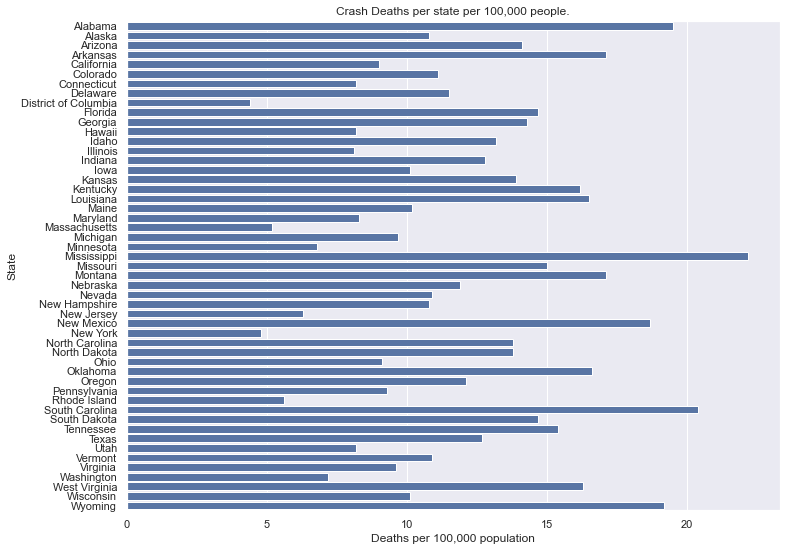

In [2]:
#Pandas has a built in method to convert web tables to a dataframe
url = "https://www.iihs.org/topics/fatality-statistics/detail/state-by-state"

#Use this special request call to mask our User-Agent and avoid a 403 forbidden HTTP error.
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
page = urlopen(req)

#Parse our page and create a soup object.
html_bytes = page.read()
html = html_bytes.decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

#Filter out the U.S. total row from the data
tables = soup.find_all('table')
df = pd.read_html(str(tables), header=1)[0]
df = df[['State', 'Deaths per 100,000 population']]
df = df[df.State != "U.S. total"]
print(df.head())

#Plot State vs Deaths in a bar chart.
sns.barplot(x="Deaths per 100,000 population", y="State", data=df, color="b").set(title="Crash Deaths per state per 100,000 people.")

# Exercise 3 - Reddit Thread Web Scrape

In [3]:
#Open the page from url
url = "https://www.reddit.com/r/NAU/new"
page = urlopen(url)

#Parse the page
html_bytes = page.read()
html = html_bytes.decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

#Grab the recent headlines from the values given by SelectorGadget
headlines = soup.find_all(class_="_3wqmjmv3tb_k-PROt7qFZe" )

#Print the text data of the grabbed text.
for i in headlines:
    print(i.text)

where is covid testing taking place?
Winter Term?
ENG 105-001 critical thinking and writing in the university community. Can I take this as a freshman? Also why are there two times? Do I go to both?
Does the Cline library kick people out after they close?
To those who decided to throw large parties for tequila sunrise
